# Check mass balance - Classical

Niccolò Tubini, 16 July 2021

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from gf.io import gf_io

In [3]:
in_rain = gf_io.read_OMS_timeseries('snowrainsep_precip_10_1_impulso.csv',-9999)
in_rain.index = pd.to_datetime(in_rain.index)

in_snow = gf_io.read_OMS_timeseries('snowrainsep_snow_10_1_impulso.csv',-9999)
in_snow.index = pd.to_datetime(in_snow.index)

In [29]:
swe_new = gf_io.read_OMS_timeseries('SWEClassical_1_impulso_hourly_new.csv',-9999)
swe_new.index = pd.to_datetime(swe_new.index)

melting_new = gf_io.read_OMS_timeseries('MeltingClassical_1_impulso_hourly_new.csv',-9999)
melting_new.index = pd.to_datetime(melting_new.index)

swe = gf_io.read_OMS_timeseries('SWEClassical_1_impulso_hourly.csv',-9999)
swe.index = pd.to_datetime(swe.index)

melting = gf_io.read_OMS_timeseries('MeltingClassical_1_impulso_hourly.csv',-9999)
melting.index = pd.to_datetime(melting.index)

## Mass Balance hourly

In [30]:
tStart = '2013-10-01 00:00'
tEnd = '2014-10-01 00:00'
in_rain[tStart:tEnd]['10'].sum()+in_snow[tStart:tEnd]['10'].sum() - melting[tStart:tEnd]['10'].sum() - swe.iloc[-1]['10']

0.0

## Mass Balance 5 minutes

In [31]:
in_rain['10'].sum()+in_snow['10'].sum() - melting_new['10'].sum()  -swe_new.iloc[-1]['10']

0.0

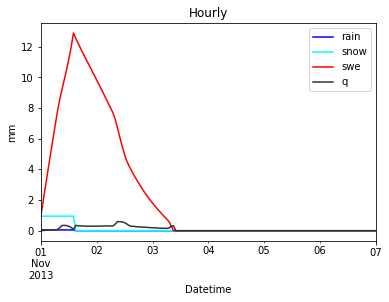

In [34]:
tStart = '2013-11-01 00:00'
tEnd = '2013-11-07 00:00'
in_rain[tStart:tEnd]['10'].plot(color='blue')
in_snow[tStart:tEnd]['10'].plot(color='cyan')
swe[tStart:tEnd]['10'].plot(color='red')
melting[tStart:tEnd]['10'].plot(color='0.2')
plt.legend(['rain', 'snow', 'swe', 'q'])
plt.ylabel("mm")
plt.title('Hourly')
plt.show()

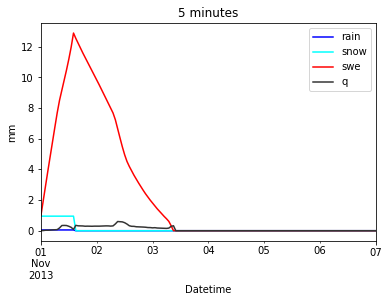

In [35]:
tStart = '2013-11-01 00:00'
tEnd = '2013-11-07 00:00'
in_rain[tStart:tEnd]['10'].plot(color='blue')
in_snow[tStart:tEnd]['10'].plot(color='cyan')
swe_new[tStart:tEnd]['10'].plot(color='red')
melting_new[tStart:tEnd]['10'].plot(color='0.2')
plt.legend(['rain', 'snow', 'swe', 'q'])
plt.ylabel("mm")
plt.title('5 minutes')
plt.show()

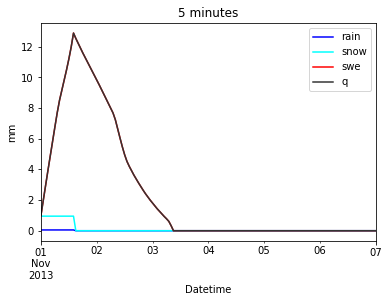

In [38]:
tStart = '2013-11-01 00:00'
tEnd = '2013-11-07 00:00'
in_rain[tStart:tEnd]['10'].plot(color='blue')
in_snow[tStart:tEnd]['10'].plot(color='cyan')
swe_new[tStart:tEnd]['10'].plot(color='red')
swe[tStart:tEnd]['10'].plot(color='0.2')
plt.legend(['rain', 'snow', 'swe', 'q'])
plt.ylabel("mm")
plt.title('5 minutes')
plt.show()

## Resample 5 min to hourly

In [36]:
melting_resampled = melting_5min.resample('1h').sum()


NameError: name 'melting_5min' is not defined

In [37]:
(melting_resampled- melting).plot()

NameError: name 'melting_resampled' is not defined

In [62]:
print('hourly\t\t\t5min')
print(swe.loc['2013-11-01 00:00']['10'], swe_5min.loc['2013-11-01 00:55']['10'])
print(swe.loc['2013-11-01 01:00']['10'], swe_5min.loc['2013-11-01 01:55']['10'])
print(swe.loc['2013-11-01 02:00']['10'], swe_5min.loc['2013-11-01 02:55']['10'])
print(swe.loc['2013-11-01 03:00']['10'], swe_5min.loc['2013-11-01 03:55']['10'])
print(swe.loc['2013-11-01 04:00']['10'], swe_5min.loc['2013-11-01 04:55']['10'])

hourly			5min
0.4683008320453411 0.4683008320453416
0.9185063118039641 0.9185063118039649
1.3519136567440158 1.3519136567440164
1.7866588010227447 1.786658801022745
2.2080259519147027 2.208025951914703


In [62]:
print('hourly\t\t\t5min')
print(swe.loc['2013-11-01 00:00']['10'], swe_5min.loc['2013-11-01 00:55']['10'])
print(swe.loc['2013-11-01 01:00']['10'], swe_5min.loc['2013-11-01 01:55']['10'])
print(swe.loc['2013-11-01 02:00']['10'], swe_5min.loc['2013-11-01 02:55']['10'])
print(swe.loc['2013-11-01 03:00']['10'], swe_5min.loc['2013-11-01 03:55']['10'])
print(swe.loc['2013-11-01 04:00']['10'], swe_5min.loc['2013-11-01 04:55']['10'])

hourly			5min
0.4683008320453411 0.4683008320453416
0.9185063118039641 0.9185063118039649
1.3519136567440158 1.3519136567440164
1.7866588010227447 1.786658801022745
2.2080259519147027 2.208025951914703


In [63]:
errorMi = gf_io.read_OMS_timeseries('errorSolidWater_hourly.csv',-9999)
errorMi = gf_io.read_OMS_timeseries('errorSolidWater_5min.csv',-9999)

errorMi.index = pd.to_datetime(errorMi.index)

errorMw = gf_io.read_OMS_timeseries('errorLiquidWater_hourly.csv',-9999)
errorMi = gf_io.read_OMS_timeseries('errorSolidWater_5min.csv',-9999)

errorMw.index = pd.to_datetime(errorMw.index)

errorSWE = gf_io.read_OMS_timeseries('errorSWE_hourly.csv',-9999)
errorSWE = gf_io.read_OMS_timeseries('errorSWE_5min.csv',-9999)
errorSWE.index = pd.to_datetime(errorSWE.index)

In [64]:
errorMw['10'].max()

2.220446049250313e-16

In [65]:
errorMw['10'].min()

-1.1102230246251565e-16

In [66]:
errorSWE['10'].max()

7.355227538141662e-16

In [67]:
errorSWE['10'].min()

-5.967448757360216e-16

In [68]:
errorMi['10'].min()

-1.8735013540549517e-16

In [69]:
errorMi['10'].max()

1.8735013540549517e-16